# Extracción(E-Extract)
#### Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

#### 📌 Enlace de la API:
####  🔗 challenge2-data-science-LATAM/TelecomX_Data.json at main · ingridcristh/challenge2-data-science-LATAM

#### 🔗GitHub - ingridcristh/challenge2-data-science-LATAM

####¿Qué debes hacer?
####✅ Cargar los datos directamente desde la API utilizando Python.
####✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

####Este es el primer paso para transformar los datos en información valiosa.

In [1]:
import pandas as pd
import requests

# URL del archivo JSON en formato raw
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Extraer datos de la API
response = requests.get(url)
data = response.json()

# Convertir a DataFrame de Pandas
# Usa json_normalize y asigna el resultado a df
df=pd.json_normalize(data)


# Mostrar las primeras filas para verificación
print("Datos cargados correctamente!")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\nVista previa de los datos:")
print(df.head())

Datos cargados correctamente!
Filas: 7267, Columnas: 21

Vista previa de los datos:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No         

#Transformacion(T-Transform)

##Conoce el conjunto de datos
#### Descripción
#### Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

#### 📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

#### 🔗 Enlace al diccionario y a la API

#### ¿Qué debes hacer?
####✅ Explorar las columnas del dataset y verificar sus tipos de datos.
####✅ Consultar el diccionario para comprender mejor el significado de las variables.
####✅ Identificar las columnas más relevantes para el análisis de evasión.

####📌 Tips:
####🔗 Documentación de DataFrame.info()
#### 🔗 Documentación de DataFrame.dtypes


In [2]:
import pandas as pd
import requests

# URL del archivo JSON en formato raw
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Extraer datos de la API
response = requests.get(url)
data = response.json()

# Convertir a DataFrame de Pandas
# Usa json_normalize y asigna el resultado a df
df = pd.json_normalize(data)

# Mostrar las primeras filas para verificación
print("Datos cargados correctamente!")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\nVista previa de los datos:")
print(df.head())

# Transformacion(T-Transform) - Conoce el conjunto de datos
print("\n" + "="*80)
print("ANÁLISIS INICIAL DEL DATASET")
print("="*80)

# 1. Explorar las columnas y tipos de datos
print("\n1. Información de columnas y tipos de datos:")
df.info()

# 2. Verificar tipos de datos específicos
print("\n2. Tipos de datos por columna:")
print(df.dtypes)

# 3. Identificar columnas relevantes para análisis de evasión
# Actualizar los nombres de las columnas para que coincidan
# con la estructura aplanada del DataFrame
churn_analysis_columns = [
    'Churn',
    'customer.SeniorCitizen', # Updated column name
    'customer.Partner',       # Updated column name
    'customer.Dependents',    # Updated column name
    'customer.tenure',        # Updated column name
    'account.Contract',       # Updated column name
    'account.PaperlessBilling', # Updated column name
    'account.PaymentMethod',  # Updated column name
    'account.Charges.Monthly',# Updated column name
    'account.Charges.Total'   # Updated column name
]

print("\n3. Columnas clave para análisis de evasión:")
print(df[churn_analysis_columns].head())

# 4. Estadísticas descriptivas de columnas numéricas relevantes
#  Actualizar los nombres de las columnas para que coincidan
#  con la estructura aplanada del DataFrame
print("\n4. Estadísticas descriptivas de variables clave:")
print(df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']].describe())

Datos cargados correctamente!
Filas: 7267, Columnas: 21

Vista previa de los datos:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No         

##Comprobación de incoherencias en los datos

####Descripción
####En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

#### 📌 Tips:

#### 🔗 Documentación de pandas.unique()
#### 🔗 Documentación de pandas.Series.dt.normalize()

In [4]:
import pandas as pd
import requests

# URL del archivo JSON en formato raw
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Extraer datos de la API
response = requests.get(url)
data = response.json()

# Convertir a DataFrame de Pandas
df = pd.json_normalize(data)

# Mostrar las primeras filas para verificación
print("¡Datos cargados correctamente!")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\n Vista previa de los datos: ")
print(df.head())

# Transformacion(T-Transform) - Conoce el conjunto de datos
print("\n" + "="*80)
print("ANÁLISIS INICIAL DEL DATASET")
print("="*80)

# 1. Explorar las columnas y tipos de datos
print("\n1. Información de columnas y tipos de datos:")
df.info()

# 2. Verificar tipos de datos específicos
print("\n 2. Tipos de datos por columna:")
print(df.dtypes)

# 3. Identificar columnas relevantes para análisis de evasión
churn_analysis_columns = [
    'Churn',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'customer.tenure',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

print("\n3. Columnas clave para análisis de evasión:")
print(df[churn_analysis_columns].head())

# 4. Estadísticas descriptivas de columnas numéricas relevantes
print("\n4. Estadísticas descriptivas de variables clave:")
print(df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']].describe())

# =============================================================================
# COMPROBACIÓN DE INCOHERENCIAS EN LOS DATOS
# =============================================================================
print("\n" + "="*80)
print("COMPROBACIÓN DE INCOHERENCIAS EN LOS DATOS")
print("="*80)

# 1. Verificar valores ausentes
print("\n1. Valores ausentes por columna:")
print(df.isnull().sum())

# 2. Verificar duplicados
print(f"\n2. Número de registros duplicados: {df.duplicated().sum()}")

# 3. Comprobar inconsistencias en categorías
categorical_columns = df.select_dtypes(include=['object']).columns

print("\n3. Inconsistencias en categorías:")
for col in categorical_columns:
    unique_vals = df[col].unique()
    print(f"\n- Columna '{col}':")
    print(f"  Número de categorías: {len(unique_vals)}")
    print(f"  Categorías únicas: {unique_vals}")

    # Verificar valores inesperados en columnas clave
    if 'Churn' in col:
        if set(unique_vals) != {'Yes', 'No'}:
            print("  ⚠️ ALERTA: Valores inesperados en columna Churn!")

    if 'gender' in col:
        if set(unique_vals) != {'Male', 'Female'}:
            print("  ⚠️ ALERTA: Valores inesperados en columna de género!")

# 4. Verificar rangos numéricos
print("\n4. Verificación de rangos numéricos:")
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"\n- Columna '{col}':")
    print(f"  Mínimo: {min_val}, Máximo: {max_val}")

    # Verificar rangos lógicos
    if 'SeniorCitizen' in col:
        if min_val < 0 or max_val > 1:
            print("  ⚠️ ALERTA: Valores fuera de rango [0,1]!")

    if 'tenure' in col:
        if min_val < 0 or max_val > 72:
            print("  ⚠️ ALERTA: Valores fuera de rango [0,72] meses!")

# 5. Detectar valores cero donde no deberían existir
print("\n5. Verificación de ceros inesperados:")
for col in ['account.Charges.Monthly', 'account.Charges.Total']:
    zero_count = (df[col] == 0).sum()
    print(f"- Columna '{col}' tiene {zero_count} valores cero")

    if zero_count > 0:
        print("  ⚠️ ALERTA: Valores cero detectados en cargos!")

# 6. Verificar consistencia entre columnas relacionadas
print("\n6. Consistencia entre columnas relacionadas:")
internet_columns = [col for col in df.columns if 'internet' in col]
print(f"- Clientes sin servicio de internet pero con servicios adicionales:")

# Crear máscara para clientes sin internet
no_internet_mask = df['internet.InternetService'] == 'No'

# Verificar si tienen servicios adicionales
additional_services = df[no_internet_mask][internet_columns].drop(columns=['internet.InternetService'])
additional_services_counts = additional_services.apply(lambda x: (x != 'No').sum()).sum()

print(f"  Total de inconsistencias detectadas: {additional_services_counts}")

# 7. Resumen final de problemas detectados
print("\n7. Resumen de problemas detectados:")
problems_found = False

if df.isnull().sum().sum() > 0:
    print("⚠️  Se detectaron valores ausentes")
    problems_found = True

if df.duplicated().sum() > 0:
    print("⚠️  Se detectaron registros duplicados")
    problems_found = True

if additional_services_counts > 0:
    print("⚠️  Se detectaron inconsistencias en servicios de internet")
    problems_found = True

if not problems_found:
    print("✅ No se detectaron problemas graves en los datos")

¡Datos cargados correctamente!
Filas: 7267, Columnas: 21

 Vista previa de los datos: 
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No      

##Manejo de inconsistencias
####Descripción
####Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

####📌 Tips:

####🔗 Manipulación de strings en pandas: lower, replace, startswith y contains | Alura Cursos Online

In [5]:
#ULTIMO CODIGO DE MANEJO DE INCOSISTENCIAS
import pandas as pd
import numpy as np
import requests
import json

# URL del archivo JSON en formato raw
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Extraer datos de la API
response = requests.get(url)
data = response.json()

# APLANAMIENTO DEL DATAFRAME
# Convertir a DataFrame de Pandas
df = pd.json_normalize(data)

print("="*80)
print("MANEJO DE INCONSISTENCIAS")
print("="*80)

# 1. Estandarización de valores categóricos
print("\n1. Estandarizando valores categóricos...")

# Diccionario de mapeo para estandarización (usando nombres de columnas aplanadas)
standardization_map = {
    'customer.gender': {
        'm': 'Male',
        'f': 'Female',
        'masculino': 'Male',
        'femenino': 'Female'
    },
    'customer.Partner': {
        'y': 'Yes',
        'n': 'No',
        'si': 'Yes',
        'sí': 'Yes'
    },
    'customer.Dependents': {
        'y': 'Yes',
        'n': 'No',
        'si': 'Yes',
        'sí': 'Yes'
    },
    'Churn': {
        'churned': 'Yes',
        'retained': 'No',
        'sí': 'Yes',
        '': np.nan Tratar cadenas vacías en Churn como NaN
    },
     'phone.PhoneService': {
        'si': 'Yes',
        'no': 'No'
     },
     'internet.InternetService': {
         'sin': 'No'
     },
     'account.Contract': {
         'anual': 'One year',
         'mensual': 'Month-to-month',
         'dos años': 'Two year'
     },
     'account.PaperlessBilling': {
         'si': 'Yes',
         'no': 'No'
     }
}

# Columnas categóricas relevantes después de aplanar
categorical_cols_to_process = [
    'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod',
    'Churn' #La tasa de abandono está en el nivel más alto
]

for col in categorical_cols_to_process:
    if col not in df.columns:
        print(f"   ⚠️ Columna '{col}' no encontrada después de aplanar. Saltando.")
        continue

    print(f"\n➡️ Procesando columna: {col}")

    # Paso 1: Convertir a string y eliminar espacios en blanco (manejar NaNs)
    # Nos aseguramos de manejar posibles valores que no sean cadenas antes
    # de aplicar .str
    df[col] = df[col].astype(str).str.strip()

    # Paso 2: Aplicar mapeo de estandarización if applicable
    if col in standardization_map:
        print(f"   Aplicando mapeo de estandarización...")
        # Utilice .loc para evitar SettingWithCopyWarning
        df.loc[:, col] = df[col].replace(standardization_map[col])


    # Paso 3: Manejo de valores inconsistentes / Conversión de tipo
    if col == 'customer.SeniorCitizen':
        # Convertir a binario (0/1) y luego a int
        df[col] = df[col].replace({
            'yes': '1',
            'no': '0',
            'si': '1',
            'true': '1',
            'false': '0'
        })
        # Convertir un número, coaccionando errores (por ejemplo, cadena 'nan' después de lower())
        # Utilice .loc para evitar SettingWithCopyWarning
        df.loc[:, col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int) # Rellene el NaN creado por coerción con 0

    elif col == 'Churn':
# Ahora que '' está asignado a NaN, complete los NaN
#  si es necesario (por ejemplo, con el modo)
         if df[col].isna().sum() > 0:
             most_common_churn = df[col].mode()
             if not most_common_churn.empty:
                 # Utilice .loc para evitar SettingWithCopyWarning
                 df.loc[df[col].isna(), col] = most_common_churn[0]
                 print(f"   Imputados NaNs en Churn con la moda: '{most_common_churn[0]}'")
             else:
                  print("   ⚠️ No se pudo imputar NaNs en Churn (moda vacía)")

    # Paso 4: Verificar valores únicos después de limpieza
    print(f"   Valores únicos finales: {df[col].unique()}")

# 2. Corrección avanzada de las columnas numéricas (ahora accesibles)
print("\n2. Corrigiendo columnas numéricas...")

numeric_cols_to_process = [
    'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total' # Utilice nombres aplanados
]

for col in numeric_cols_to_process:
    if col not in df.columns:
        print(f"   ⚠️ Columna '{col}' no encontrada después de aplanar. Saltando.")
        continue

    print(f"\n➡️ Procesando columna: {col}")

    # Paso 1: Convertir a numérico, coercing errors
    # Utilice .loc para evitar SettingWithCopyWarning
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')

    # Paso 2: Identificar valores faltantes (NaNs created by coerce)
    missing_mask = df[col].isna()
    missing_count = missing_mask.sum()

    if missing_count > 0:
        print(f"   ⚠️ Encontrados {missing_count} valores faltantes")

        if col == 'account.Charges.Total':
             # Estrategia de imputación para TotalCharges: tenure * MonthlyCharges
             # Asegúrese de que la tenencia y los cargos mensuales sean numéricos antes del cálculo
             # Utilice .loc para evitar SettingWithCopyWarning
             df.loc[:, 'customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce').fillna(0)
             df.loc[:, 'account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce').fillna(0)

             # # Calcular en función de la tenencia no NaN y de los cargos mensuales donde los cargos totales son NaN
             imputed_values = df.loc[missing_mask, 'customer.tenure'] * df.loc[missing_mask, 'account.Charges.Monthly']
             # Utilice .loc para evitar SettingWithCopyWarning
             df.loc[missing_mask, col] = imputed_values

             print("   Valores imputados en 'account.Charges.Total' usando tenure * MonthlyCharges")

        elif col in ['customer.tenure', 'account.Charges.Monthly']:
             # Para otras numéricas: imputar con la mediana
             median_val = df[col].median()
             if pd.notna(median_val):
                 # Utilice .loc para evitar SettingWithCopyWarning
                 df.loc[missing_mask, col] = median_val
                 print(f"   Imputados valores faltantes en '{col}' con la mediana: {median_val:.2f}")
             else:
                  print(f"   ⚠️ No se pudo imputar valores faltantes en '{col}' (mediana es NaN)")

    # Paso 3: Detectar valores negativos (reemplazar con 0 o NaN si no tiene sentido)
    if col in ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']:
        negative_mask = df[col] < 0
        negative_count = negative_mask.sum()
        if negative_count > 0:
            print(f"   ⚠️ Encontrados {negative_count} valores negativos en '{col}'")
            # Utilice .loc para evitar SettingWithCopyWarning
            df.loc[negative_mask, col] = 0 # Reemplace los negativos con 0
            print("   Valores negativos reemplazados con 0")

# 3. Verificación y corrección de inconsistencias en servicios de internet/phone
print("\n3. Corrigiendo inconsistencias en servicios de internet/phone...")

# Identificar columnas relacionadas con los servicios de Internet y telefonía
internet_cols = [col for col in df.columns if 'internet.' in col and col != 'internet.InternetService']
phone_cols = [col for col in df.columns if 'phone.' in col and col != 'phone.PhoneService']


# Servicios de Internet correctos para clientes sin servicio de Internet
if 'internet.InternetService' in df.columns:
    no_internet_mask = df['internet.InternetService'] == 'No'
    for col in internet_cols:
        if col in df.columns:
             # Utilice .loc para evitar SettingWithCopyWarning
             df.loc[no_internet_mask, col] = 'No internet service'
    if no_internet_mask.any():
        print("   - Corregidos servicios adicionales para clientes sin internet")

# Servicios telefónicos correctos para clientes sin servicio
# telefónico (por ejemplo, líneas múltiples)
if 'phone.PhoneService' in df.columns:
    no_phone_mask = df['phone.PhoneService'] == 'No'
    if 'phone.MultipleLines' in df.columns:
        # Utilice .loc para evitar SettingWithCopyWarning
        df.loc[no_phone_mask, 'phone.MultipleLines'] = 'No phone service'
    if no_phone_mask.any():
        print("   - Corregido 'MultipleLines' para clientes sin servicio telefónico")


# 4. Verificación después de correcciones
print("\n4. Verificación después de correcciones:")

# Verificar valores de abandono
print("\n - Valores únicos en Churn:", df['Churn'].unique())
# Verificar valores de género
if 'customer.gender' in df.columns:
    print(" - Valores únicos en género:", df['customer.gender'].unique())
# Verificar los valores del servicio de Internet
if 'internet.InternetService' in df.columns:
    print(" - Valores únicos en InternetService:", df['internet.InternetService'].unique())
# Verificar valores del servicio telefónico
if 'phone.PhoneService' in df.columns:
     print(" - Valores únicos en PhoneService:", df['phone.PhoneService'].unique())
if 'phone.MultipleLines' in df.columns:
    print(" - Valores únicos en MultipleLines:", df['phone.MultipleLines'].unique())
# Verificar cargos mensuales
if 'account.Charges.Monthly' in df.columns:
    zero_monthly_after = (df['account.Charges.Monthly'] == 0).sum()
    print(f" - Registros con cargo mensual cero: {zero_monthly_after}")
# Verificar cargos totales
if 'account.Charges.Total' in df.columns:
    zero_total_after = (df['account.Charges.Total'] == 0).sum()
    print(f" - Registros con cargo total cero: {zero_total_after}")
    print(f" - Valores faltantes en TotalCharges después de imputación: {df['account.Charges.Total'].isna().sum()}")


# 5. Guardar el DataFrame limpio (opcional, pero buena práctica)
try:
    df.to_csv('telecom_data_clean.csv', index=False)
    print("\nDatos limpios guardados en 'telecom_data_clean.csv'")
except Exception as e:
    print(f"\n⚠️ Error al intentar guardar el archivo CSV: {e}")

print("\n" + "="*80)
print("MANEJO DE INCONSISTENCIAS COMPLETADO")
print("="*80)

MANEJO DE INCONSISTENCIAS

1. Estandarizando valores categóricos...

➡️ Procesando columna: customer.gender
   Aplicando mapeo de estandarización...
   Valores únicos finales: ['Female' 'Male']

➡️ Procesando columna: customer.SeniorCitizen
   Valores únicos finales: [0 1]

➡️ Procesando columna: customer.Partner
   Aplicando mapeo de estandarización...
   Valores únicos finales: ['Yes' 'No']

➡️ Procesando columna: customer.Dependents
   Aplicando mapeo de estandarización...
   Valores únicos finales: ['Yes' 'No']

➡️ Procesando columna: phone.PhoneService
   Aplicando mapeo de estandarización...
   Valores únicos finales: ['Yes' 'No']

➡️ Procesando columna: phone.MultipleLines
   Valores únicos finales: ['No' 'Yes' 'No phone service']

➡️ Procesando columna: internet.InternetService
   Aplicando mapeo de estandarización...
   Valores únicos finales: ['DSL' 'Fiber optic' 'No']

➡️ Procesando columna: internet.OnlineSecurity
   Valores únicos finales: ['No' 'Yes' 'No internet service'

##Columna de cuenstas diarias
####Descripción
####Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

####📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.


In [6]:
# ... (código previo de limpieza)

# =============================================================================
# CREACIÓN DE COLUMNA "CUENTAS_DIARIAS"
# =============================================================================
print("\n" + "="*80)
print("CREACIÓN DE COLUMNA 'CUENTAS_DIARIAS'")
print("="*80)

# Calcular las cuentas diarias (cargos mensuales / 30 días)
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30
df['Cuentas_Diarias'] = df['Cuentas_Diarias'].round(2)

# Verificación del cálculo
print("\nCálculo de cuentas diarias:")
print(f" - Cargo mensual promedio: ${df['account.Charges.Monthly'].mean():.2f}")
print(f" - Cuenta diaria promedio: ${df['Cuentas_Diarias'].mean():.2f}")
print(f" - Relación mensual/diaria: {df['account.Charges.Monthly'].mean() / df['Cuentas_Diarias'].mean():.1f} (esperado: 30.0)")

# Ejemplos
print("\nEjemplos de cálculo:")
print(df[['customerID', 'account.Charges.Monthly', 'Cuentas_Diarias']].sample(5))

# 5. Guardar el DataFrame limpio con la nueva columna
df.to_csv('telecom_data_clean.csv', index=False)
print("\nDatos limpios con columna 'Cuentas_Diarias' guardados en 'telecom_data_clean.csv'")



CREACIÓN DE COLUMNA 'CUENTAS_DIARIAS'

Cálculo de cuentas diarias:
 - Cargo mensual promedio: $64.72
 - Cuenta diaria promedio: $2.16
 - Relación mensual/diaria: 30.0 (esperado: 30.0)

Ejemplos de cálculo:
      customerID  account.Charges.Monthly  Cuentas_Diarias
6042  8246-SHFGA                    21.10             0.70
4149  5688-KZTSN                    20.00             0.67
1829  2606-PKWJB                    40.25             1.34
1084  1536-HBSWP                    49.90             1.66
4867  6654-QGBZZ                    19.90             0.66

Datos limpios con columna 'Cuentas_Diarias' guardados en 'telecom_data_clean.csv'


##Estandarización  y transformación de datos(opcional)
####Descripción
####La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

####Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [8]:
# =============================================================================
# ESTANDARIZACIÓN Y TRANSFORMACIÓN DE DATOS
# =============================================================================
print("\n" + "="*80)
print("ESTANDARIZACIÓN Y TRANSFORMACIÓN DE DATOS")
print("="*80)

# Suponemos que df ya está cargado, aplanado y limpiado de los pasos anteriores.

# 1. Conversión de variables categóricas a binarias
print("\n1. Convertiendo variables categóricas a binarias...")

# Mapeo de valores binarios - Asegúrese de que cubra todos los valores únicos relevantes después de la limpieza.
binary_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0,
                  'yes': 1, 'no': 0} # Incluya minúsculas ya que la limpieza podría haber convertido


# Columnas para convertir a binario (utilizando nombres de columnas aplanados)
binary_columns = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'account.PaperlessBilling',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    # # customer.SeniorCitizen ya es 0/1 de los pasos anteriores, no es necesario mapear aquí
]

for col in binary_columns:
    if col in df.columns:
        # # Asegúrese de que la columna sea de tipo cadena antes de asignarla para evitar errores con números
        df[col] = df[col].astype(str).map(binary_mapping).fillna(df[col])
        # Convertir a entero cuando sea posible, forzando errores (por ejemplo, si quedan NaN)
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64') # Utilice Int64 para permitir NaN potenciales
        print(f" - Convertida columna '{col}' a binaria")
    else:
        print(f" - ⚠️ Columna '{col}' no encontrada. Saltando conversión a binaria.")


# 2. Transformación de género a binario
print("\n2. Transformando género a variable binaria...")
# Utilice el nombre de columna aplanado correcto 'customer.gender'
if 'customer.gender' in df.columns:
    # Asegúrese de que la columna sea de tipo cadena antes de asignarla
    df['customer.gender'] = df['customer.gender'].astype(str).map({'Male': 1, 'Female': 0, 'male': 1, 'female': 0}).fillna(df['customer.gender'])
     # Convertir a entero cuando sea posible, forzando errores
    df['customer.gender'] = pd.to_numeric(df['customer.gender'], errors='coerce').astype('Int64')
    print(" - Género convertido: Male/male=1, Female/female=0")
else:
    print(" - ⚠️ Columna 'customer.gender' no encontrada. Saltando transformación de género.")


# 3. Traducción y renombrado de columnas
print("\n3. Traduciendo y renombrando columnas...")

# Diccionario de traducción (using flattened column names and desired new names)
translation_dict = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer.gender': 'Genero', # Nombre de columna corregido
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Meses_Contrato', # Nombre de columna corregido
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Facturacion_Digital',
    'account.PaymentMethod': 'Metodo_Pago',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Lineas_Multiples',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'TV_Streaming',
    'internet.StreamingMovies': 'Peliculas_Streaming',
    'account.Charges.Monthly': 'Cargos_Mensuales', # Nombre de columna corregido
    'account.Charges.Total': 'Cargos_Totales',   # Nombre de columna corregido
    'Cuentas_Diarias': 'Cuentas_Diarias',
    # Incluya la columna de cargos diarios ajustados si existe
    'Cuentas_Diarias_Ajustada': 'Cuentas_Diarias_Ajustada'
}

# Renombrar columnas: solo intente cambiar el nombre si la columna existe
df = df.rename(columns={k: v for k, v in translation_dict.items() if k in df.columns})
print(" - Columnas renombradas según diccionario.")

# 4. Estandarización de valores en columnas categóricas (non-binary)
print("\n4. Estandarizando valores categóricas (no binarias)...")

# Contrato (use el nuevo nombre de columna 'Tipo_Contrato')
if 'Tipo_Contrato' in df.columns:
    df['Tipo_Contrato'] = df['Tipo_Contrato'].replace({
        'Month-to-month': 'Mensual',
        'One year': 'Anual',
        'Two year': 'Bianual'
    })
    print(" - Estandarizado 'Tipo_Contrato'.")
else:
    print(" - ⚠️ Columna 'Tipo_Contrato' no encontrada. Saltando estandarización.")

# Método de pago (use el nuevo nombre de columna 'Metodo_Pago')
if 'Metodo_Pago' in df.columns:
    df['Metodo_Pago'] = df['Metodo_Pago'].replace({
        'Bank transfer (automatic)': 'Transferencia Bancaria',
        'Credit card (automatic)': 'Tarjeta de Crédito',
        'Electronic check': 'Cheque Electrónico',
        'Mailed check': 'Cheque Postal'
    })
    print(" - Estandarizado 'Metodo_Pago'.")
else:
     print(" - ⚠️ Columna 'Metodo_Pago' no encontrada. Saltando estandarización.")


# Servicio de Internet use el nuevo nombre de columna 'Servicio_Internet')
if 'Servicio_Internet' in df.columns:
    df['Servicio_Internet'] = df['Servicio_Internet'].replace({
        'DSL': 'DSL',
        'Fiber optic': 'Fibra Óptica',
        'No': 'Sin Internet' # Suponiendo que 'Sin servicio de Internet' se asignó a 'No' en la limpieza
    })
    print(" - Estandarizado 'Servicio_Internet'.")
else:
     print(" - ⚠️ Columna 'Servicio_Internet' no encontrada. Saltando estandarización.")


# 5. Verificación de las transformaciones
print("\n5. Verificación de transformaciones:")
print(" - Columnas renombradas (verificar nombres):", list(df.columns))
if 'Evasion' in df.columns:
    print("\n - Valores únicos en 'Evasion':", df['Evasion'].unique())
if 'Genero' in df.columns:
    print(" - Valores únicos en 'Genero':", df['Genero'].unique())
if 'Tipo_Contrato' in df.columns:
    print(" - Valores únicos en 'Tipo_Contrato':", df['Tipo_Contrato'].unique())
if 'Metodo_Pago' in df.columns:
    print(" - Valores únicos en 'Metodo_Pago':", df['Metodo_Pago'].unique())
if 'Servicio_Internet' in df.columns:
    print(" - Valores únicos en 'Servicio_Internet':", df['Servicio_Internet'].unique())
# Verificar algunas columnas binarias
if 'Pareja' in df.columns:
     print(" - Valores únicos en 'Pareja':", df['Pareja'].unique())
if 'Facturacion_Digital' in df.columns:
    print(" - Valores únicos en 'Facturacion_Digital':", df['Facturacion_Digital'].unique())


# 6. Guardar el DataFrame transformado
try:
    df.to_csv('telecom_data_transformado.csv', index=False)
    print("\nDatos estandarizados y transformados guardados en 'telecom_data_transformado.csv'")
except Exception as e:
    print(f"\n⚠️ Error al intentar guardar el archivo CSV: {e}")


print("\n" + "="*80)
print("ESTANDARIZACIÓN Y TRANSFORMACIÓN DE DATOS COMPLETADO")
print("="*80)


ESTANDARIZACIÓN Y TRANSFORMACIÓN DE DATOS

1. Convertiendo variables categóricas a binarias...
 - ⚠️ Columna 'Churn' no encontrada. Saltando conversión a binaria.
 - ⚠️ Columna 'customer.Partner' no encontrada. Saltando conversión a binaria.
 - ⚠️ Columna 'customer.Dependents' no encontrada. Saltando conversión a binaria.
 - ⚠️ Columna 'account.PaperlessBilling' no encontrada. Saltando conversión a binaria.
 - ⚠️ Columna 'phone.PhoneService' no encontrada. Saltando conversión a binaria.
 - ⚠️ Columna 'phone.MultipleLines' no encontrada. Saltando conversión a binaria.
 - ⚠️ Columna 'internet.OnlineSecurity' no encontrada. Saltando conversión a binaria.
 - ⚠️ Columna 'internet.OnlineBackup' no encontrada. Saltando conversión a binaria.
 - ⚠️ Columna 'internet.DeviceProtection' no encontrada. Saltando conversión a binaria.
 - ⚠️ Columna 'internet.TechSupport' no encontrada. Saltando conversión a binaria.
 - ⚠️ Columna 'internet.StreamingTV' no encontrada. Saltando conversión a binaria.
 

# Carga y análisis(L - Load & Analysis)
 ## Análisis Descriptivo
####Descripción
####Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

#### 📌 Consejos:

#### 🔗 Documentación de DataFrame.describe()

In [9]:
# ANÁLISIS DESCRIPTIVO
# =============================================================================
print("\n" + "="*80)
print("ANÁLISIS DESCRIPTIVO")
print("="*80)

# 1. Estadísticas generales
print("\n1. Estadísticas descriptivas generales:")
print(df.describe(include='all').transpose())

# 2. Análisis de variables numéricas
print("\n2. Análisis de variables numéricas:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numeric_cols].describe().transpose())

# 3. Análisis de variables categóricas
print("\n3. Análisis de variables categóricas:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n- Columna '{col}':")
    print(f"  Conteo de categorías:\n{df[col].value_counts()}")
    print(f"  Proporciones:\n{df[col].value_counts(normalize=True).apply(lambda x: f'{x:.2%}')}")

# 4. Análisis de evasión
print("\n4. Análisis de evasión (Churn):")
churn_rate = df['Evasion'].mean()
print(f" - Tasa general de evasión: {churn_rate:.2%}")

# 5. Relación entre evasión y variables categóricas
print("\n5. Tasa de evasión por categorías:")
for col in categorical_cols:
    if col != 'ID_Cliente':
        print(f"\n - {col}:")
        print(df.groupby(col)['Evasion'].mean().apply(lambda x: f"{x:.2%}"))

# 6. Correlación con evasión
print("\n6. Correlación con evasión:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
churn_corr = df[numeric_cols].corrwith(df['Evasion'])
print(churn_corr.sort_values(ascending=False))

# 7. Comparación entre clientes fieles vs. que evaden
print("\n7. Comparación entre clientes fieles vs. que evaden:")
loyal = df[df['Evasion'] == 0]
churned = df[df['Evasion'] == 1]

print("\n - Promedio de meses de contrato:")
print(f"   Fieles: {loyal['Meses_Contrato'].mean():.1f} meses")
print(f"   Evadidos: {churned['Meses_Contrato'].mean():.1f} meses")

print("\n - Cargos mensuales promedio:")
print(f"   Fieles: ${loyal['Cargos_Mensuales'].mean():.2f}")
print(f"   Evadidos: ${churned['Cargos_Mensuales'].mean():.2f}")

# 8. Guardar reporte de análisis
with open('reporte_analisis.txt', 'w') as f:
    f.write("REPORTE DE ANÁLISIS DESCRIPTIVO\n")
    f.write("==============================\n\n")
    f.write(f"Total de clientes: {len(df)}\n")
    f.write(f"Tasa de evasión: {churn_rate:.2%}\n\n")
    f.write("Principales hallazgos:\n")
    f.write(f"- Clientes fieles permanecen {loyal['Meses_Contrato'].mean():.1f} meses vs {churned['Meses_Contrato'].mean():.1f} meses de evadidos\n")
    f.write(f"- Cargos mensuales promedio: Fieles ${loyal['Cargos_Mensuales'].mean():.2f} vs Evadidos ${churned['Cargos_Mensuales'].mean():.2f}\n")
    f.write("\nVariables con mayor correlación con evasión:\n")
    f.write(churn_corr.sort_values(ascending=False).head(5).to_string())

print("\nReporte de análisis guardado como 'reporte_analisis.txt'")


ANÁLISIS DESCRIPTIVO

1. Estadísticas descriptivas generales:
                         count  unique                 top    freq       mean  \
ID_Cliente                7267    7267          9995-HOTOH       1        NaN   
Evasion                 7267.0    <NA>                <NA>    <NA>    0.25719   
Genero                  7267.0    <NA>                <NA>    <NA>   0.505711   
Adulto_Mayor            7267.0     2.0                 0.0  6085.0        NaN   
Pareja                  7267.0    <NA>                <NA>    <NA>   0.484106   
Dependientes            7267.0    <NA>                <NA>    <NA>   0.300124   
Meses_Contrato          7267.0     NaN                 NaN     NaN  32.346498   
Servicio_Telefonico     7267.0    <NA>                <NA>    <NA>   0.902711   
Lineas_Multiples        7267.0    <NA>                <NA>    <NA>    0.42177   
Servicio_Internet         7267       3        Fibra Óptica    3198        NaN   
Seguridad_Online        7267.0    <NA>        

##Distribucion de evasion
####Descripción
####En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.


DISTRIBUCIÓN DE EVASIÓN

Conteo de clientes por estado de evasión:


,count
Evasion,
0,5398
1,1869



Proporción de clientes por estado de evasión (%):


,proportion
Evasion,
0,74.280996
1,25.719004


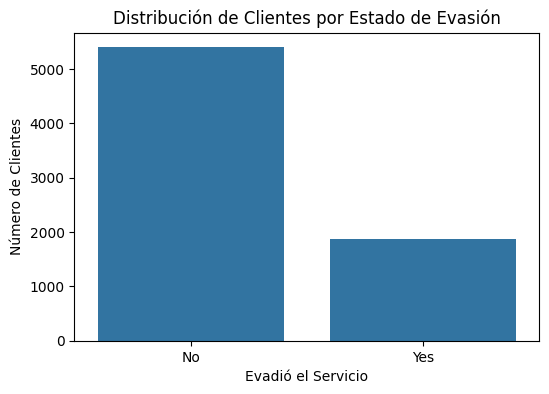


✅ Análisis de distribución de evasión completado.


In [12]:
# =============================================================================
# Distribucion de evasion
# =============================================================================
print("\n" + "="*80)
print("DISTRIBUCIÓN DE EVASIÓN")
print("="*80)

# Calcular la distribución de la variable de evasión
evasion_counts = df['Evasion'].value_counts()
evasion_proportions = df['Evasion'].value_counts(normalize=True) * 100

print("\nConteo de clientes por estado de evasión:")
display(evasion_counts)

print("\nProporción de clientes por estado de evasión (%):")
display(evasion_proportions)

# Visualización de la distribución de evasión
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Evasion', data=df)
plt.title('Distribución de Clientes por Estado de Evasión')
plt.xlabel('Evadió el Servicio')
plt.ylabel('Número de Clientes')
# Update x-tick labels to match the original 'Churn' values
plt.xticks([0, 1], ['No', 'Yes']) # Assuming 'No' and 'Yes' are the values in 'Churn'
plt.show()

print("\n✅ Análisis de distribución de evasión completado.")

##Recuento de evasion por variables categóricas
####Descripción
####Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

####Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.


RECUENTO DE EVASIÓN POR VARIABLES CATEGÓRICAS

Analizando evasión por las siguientes variables categóricas:
['Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Lineas_Multiples', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Tipo_Contrato', 'Facturacion_Digital', 'Metodo_Pago', 'Cargos_Totales']

--- Análisis para la columna: Genero ---

Tasa de evasión (%) por 'Genero':


,Evasion
Genero,
0,26.141425
1,25.306122


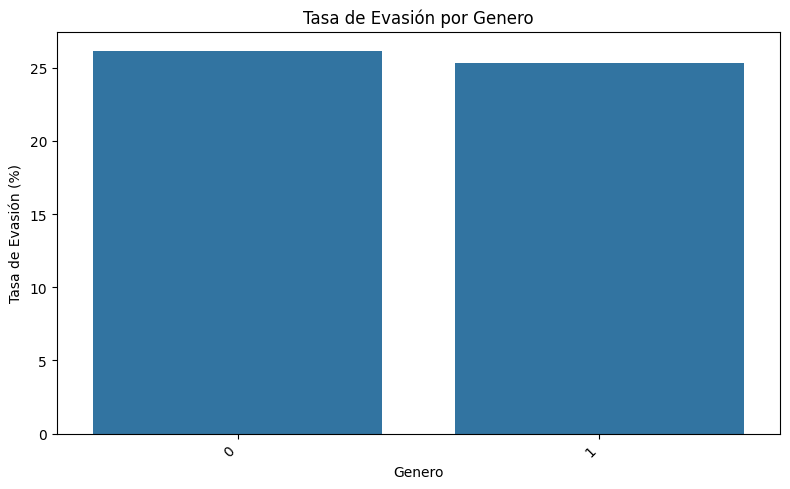


--- Análisis para la columna: Adulto_Mayor ---

Tasa de evasión (%) por 'Adulto_Mayor':


,Evasion
Adulto_Mayor,
1,40.270728
0,22.892358


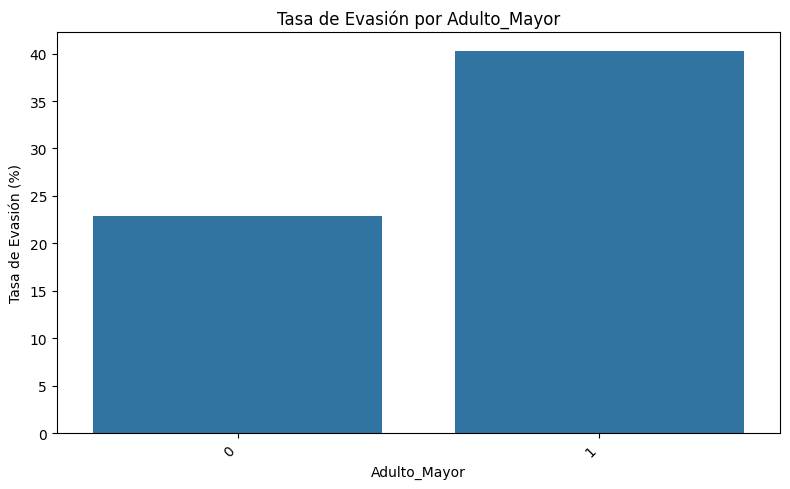


--- Análisis para la columna: Pareja ---

Tasa de evasión (%) por 'Pareja':


,Evasion
Pareja,
0,32.008536
1,19.016487


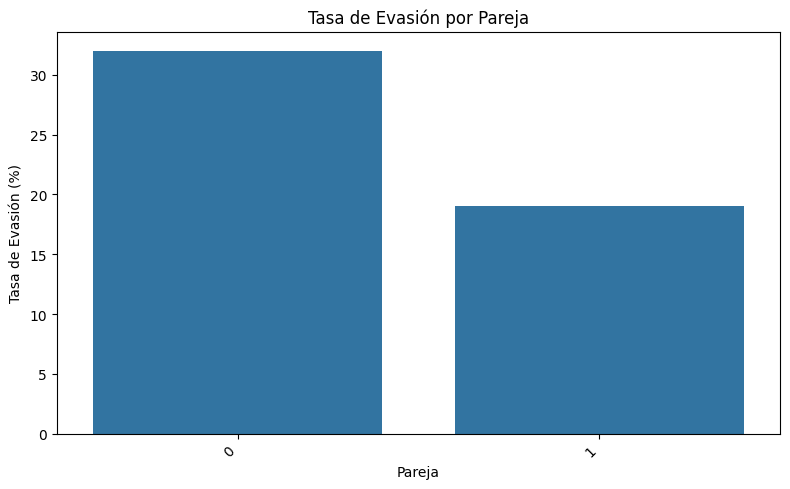


--- Análisis para la columna: Dependientes ---

Tasa de evasión (%) por 'Dependientes':


,Evasion
Dependientes,
0,30.338183
1,14.947272


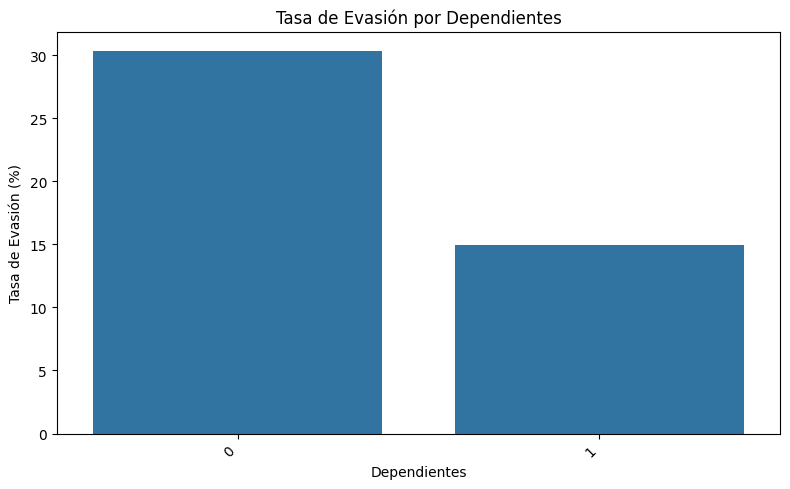


--- Análisis para la columna: Meses_Contrato ---

Tasa de evasión (%) por 'Meses_Contrato':


,Evasion
Meses_Contrato,
1,59.936909
2,50.0
5,46.376812
3,45.410628
4,44.864865
...,...
63,5.479452
64,4.819277
71,3.409091


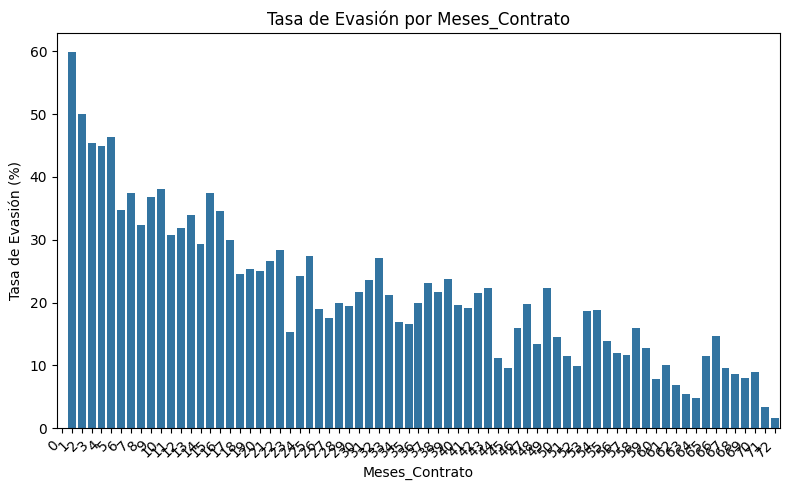


--- Análisis para la columna: Servicio_Telefonico ---

Tasa de evasión (%) por 'Servicio_Telefonico':


,Evasion
Servicio_Telefonico,
1,25.89939
0,24.045262


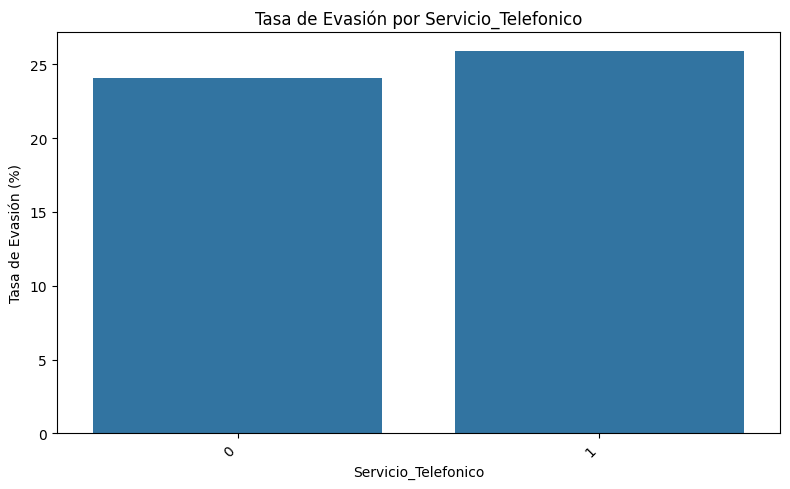


--- Análisis para la columna: Lineas_Multiples ---

Tasa de evasión (%) por 'Lineas_Multiples':


,Evasion
Lineas_Multiples,
1,27.732463
0,24.250357


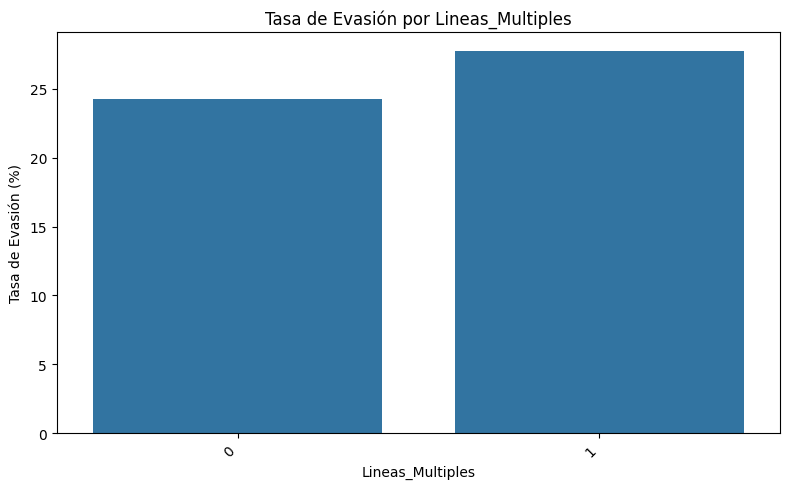


--- Análisis para la columna: Servicio_Internet ---

Tasa de evasión (%) por 'Servicio_Internet':


,Evasion
Servicio_Internet,
Fibra Óptica,40.556598
DSL,18.448553
Sin Internet,7.147375


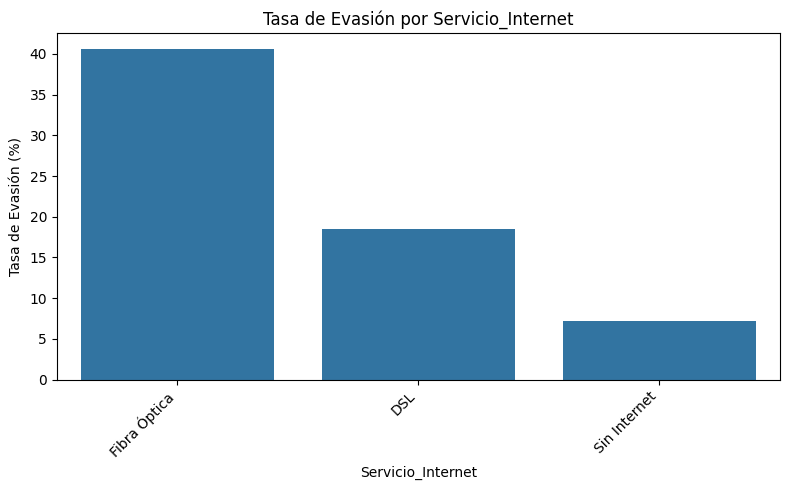


--- Análisis para la columna: Seguridad_Online ---

Tasa de evasión (%) por 'Seguridad_Online':


,Evasion
Seguridad_Online,
0,30.333398
1,14.196343


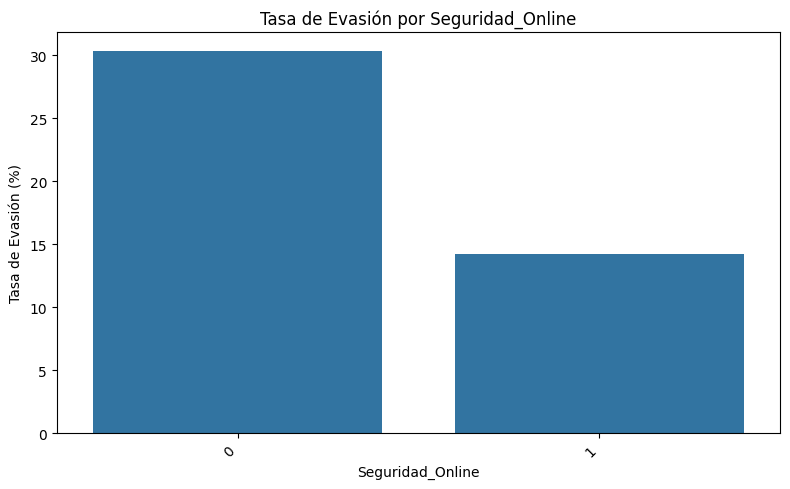


--- Análisis para la columna: Respaldo_Online ---

Tasa de evasión (%) por 'Respaldo_Online':


,Evasion
Respaldo_Online,
0,28.2595
1,20.886581


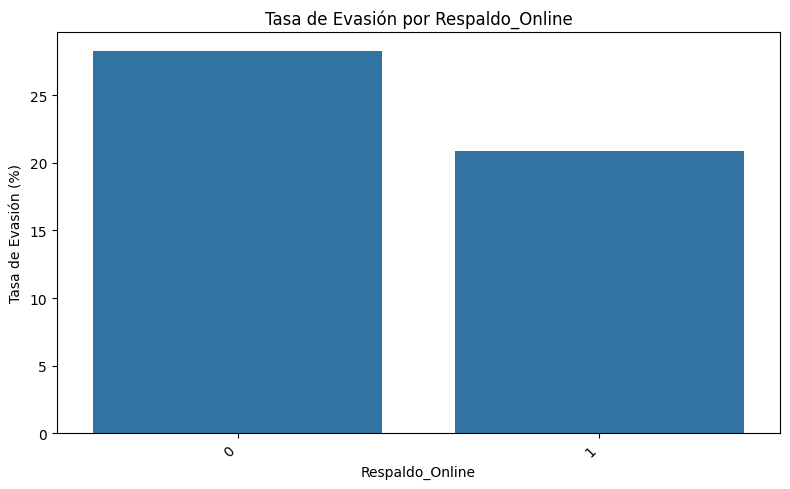


--- Análisis para la columna: Proteccion_Dispositivo ---

Tasa de evasión (%) por 'Proteccion_Dispositivo':


,Evasion
Proteccion_Dispositivo,
0,27.721943
1,21.878764


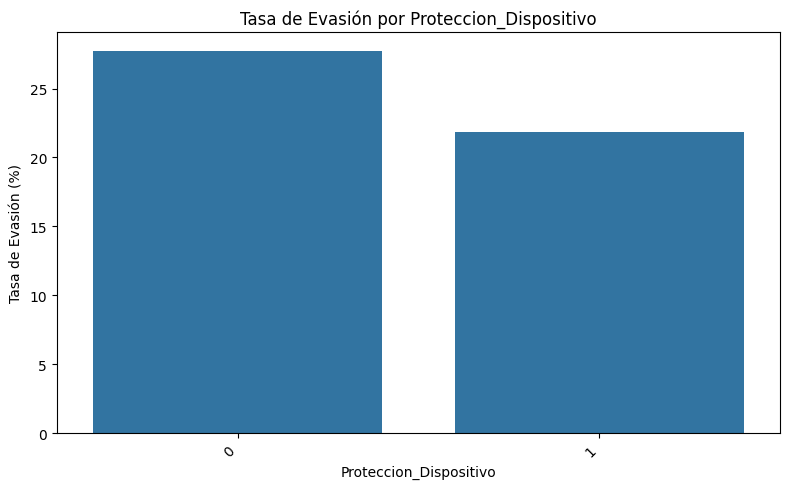


--- Análisis para la columna: Soporte_Tecnico ---

Tasa de evasión (%) por 'Soporte_Tecnico':


,Evasion
Soporte_Tecnico,
0,30.195623
1,14.73384


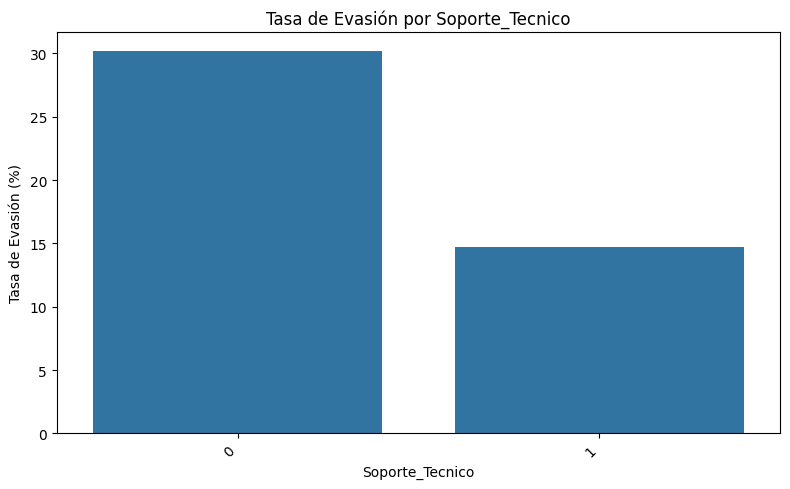


--- Análisis para la columna: TV_Streaming ---

Tasa de evasión (%) por 'TV_Streaming':


,Evasion
TV_Streaming,
1,29.175627
0,23.564887


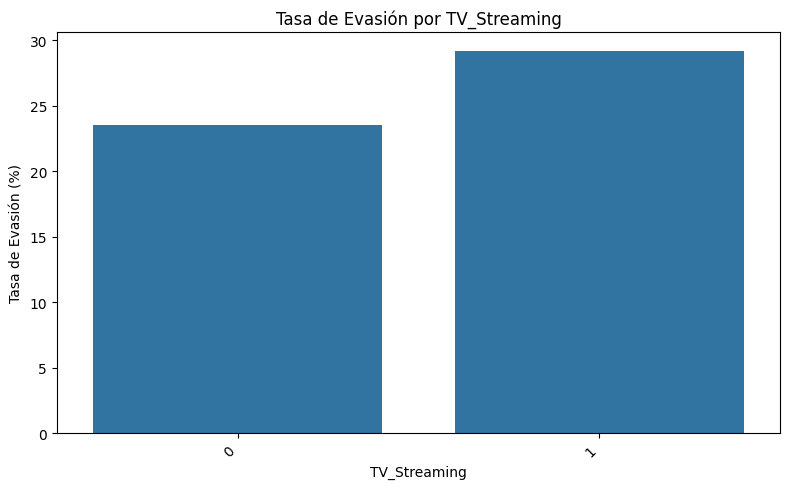


--- Análisis para la columna: Peliculas_Streaming ---

Tasa de evasión (%) por 'Peliculas_Streaming':


,Evasion
Peliculas_Streaming,
1,29.048295
0,23.612671


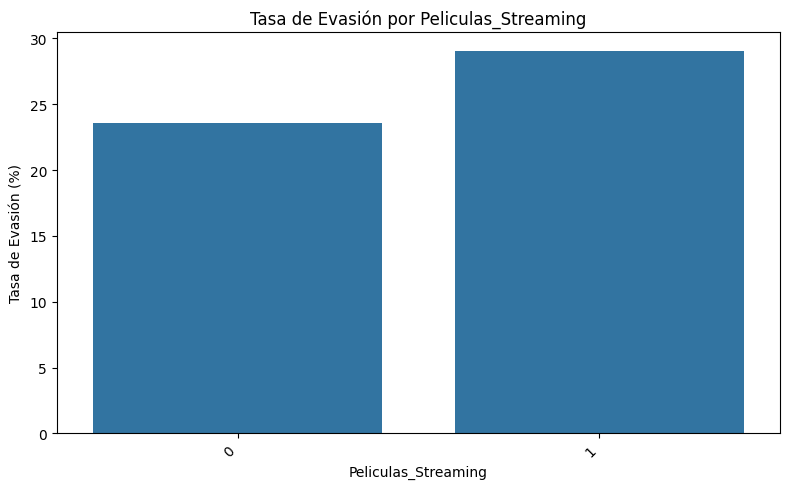


--- Análisis para la columna: Tipo_Contrato ---

Tasa de evasión (%) por 'Tipo_Contrato':


,Evasion
Tipo_Contrato,
Mensual,41.323346
Anual,10.928242
Bianual,2.753873


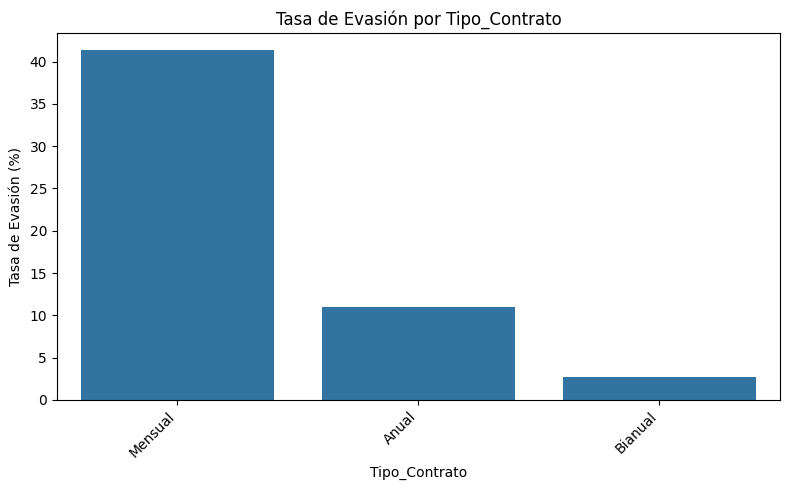


--- Análisis para la columna: Facturacion_Digital ---

Tasa de evasión (%) por 'Facturacion_Digital':


,Evasion
Facturacion_Digital,
1,32.475064
0,15.866035


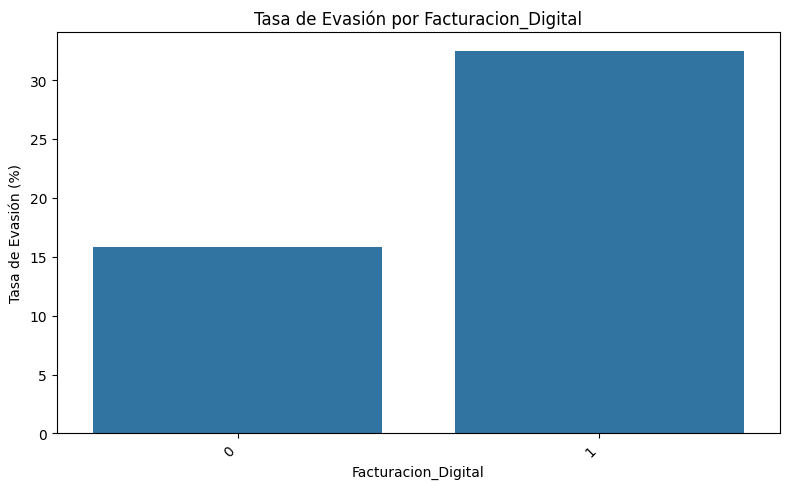


--- Análisis para la columna: Metodo_Pago ---

Tasa de evasión (%) por 'Metodo_Pago':


,Evasion
Metodo_Pago,
Cheque Electrónico,43.803681
Cheque Postal,18.498498
Transferencia Bancaria,16.236627
Tarjeta de Crédito,14.795918


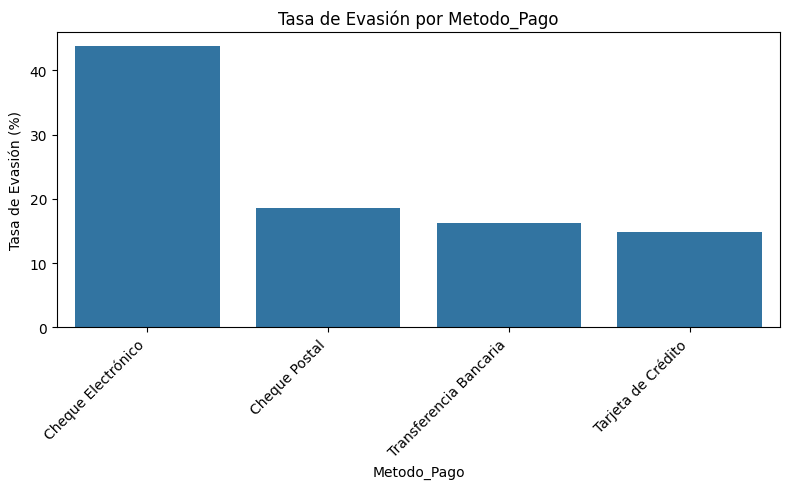


--- Análisis para la columna: Cargos_Totales ---

Tasa de evasión (%) por 'Cargos_Totales':


,Evasion
Cargos_Totales,
266.90,100.0
6396.45,100.0
676.35,100.0
2839.65,100.0
676.70,100.0
...,...
1212.85,0.0
1212.25,0.0
1212.10,0.0


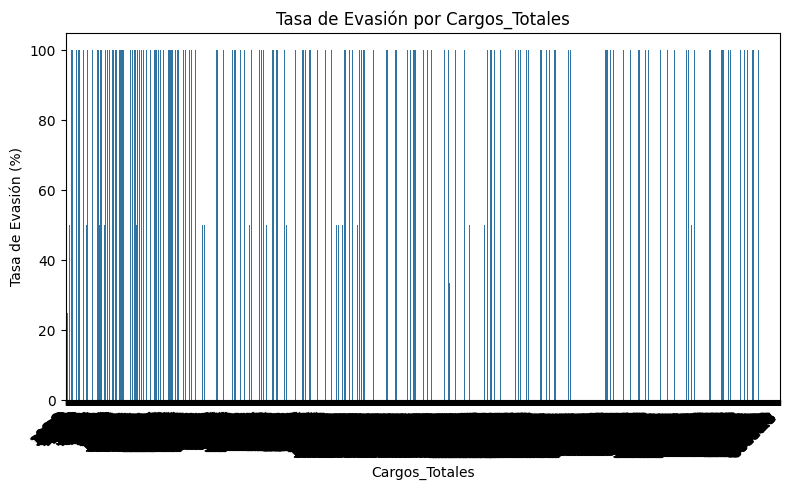


✅ Análisis de evasión por variables categóricas completado.


In [13]:
# =============================================================================
# Recuento de evasion por variables categóricas
# =============================================================================
print("\n" + "="*80)
print("RECUENTO DE EVASIÓN POR VARIABLES CATEGÓRICAS")
print("="*80)

# Identify categorical columns (excluding the target variable and ID)
categorical_cols = df.select_dtypes(include=['object', 'Int64']).columns.tolist()
categorical_cols.remove('ID_Cliente')
if 'Evasion' in categorical_cols:
    categorical_cols.remove('Evasion')

print("\nAnalizando evasión por las siguientes variables categóricas:")
print(categorical_cols)

for col in categorical_cols:
    print(f"\n--- Análisis para la columna: {col} ---")

    # Calculate churn rate for each category
    # Use .groupby() and .mean() on the binary 'Evasion' column
    evasion_by_category = df.groupby(col)['Evasion'].mean().sort_values(ascending=False) * 100

    print(f"\nTasa de evasión (%) por '{col}':")
    display(evasion_by_category)

    # Optional: Visualize the churn rate per category
    plt.figure(figsize=(8, 5))
    sns.barplot(x=evasion_by_category.index, y=evasion_by_category.values)
    plt.title(f'Tasa de Evasión por {col}')
    plt.xlabel(col)
    plt.ylabel('Tasa de Evasión (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\n✅ Análisis de evasión por variables categóricas completado.")

##Conteo de evasion por variables numéricas
####Descripción
####En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

####Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.


CONTEO DE EVASIÓN POR VARIABLES NUMÉRICAS

Analizando evasión por las siguientes variables numéricas:
['Genero', 'Pareja', 'Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Lineas_Multiples', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Facturacion_Digital', 'Cargos_Mensuales', 'Cuentas_Diarias']

--- Análisis para la columna: Genero ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.508522,0.499974,0.0,0.0,1.0,1.0,1.0
1,1869.0,0.497592,0.500128,0.0,0.0,0.0,1.0,1.0


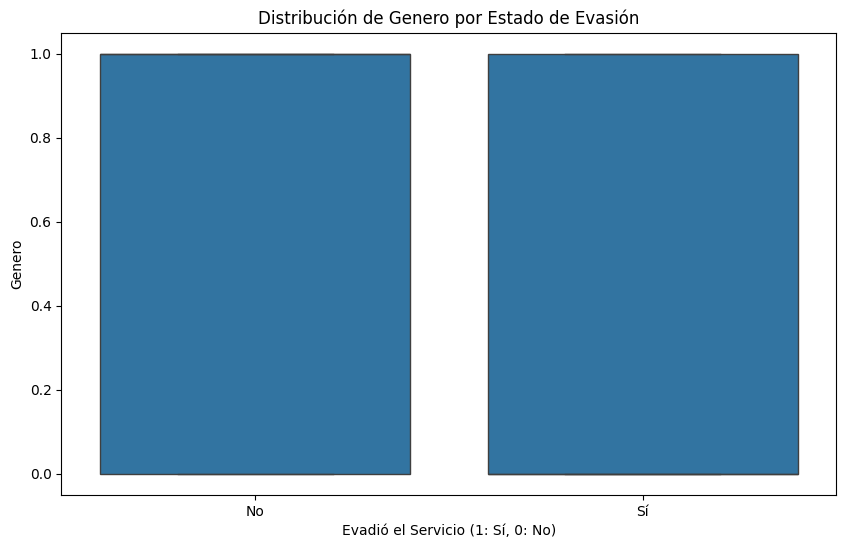


--- Análisis para la columna: Pareja ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.527788,0.499273,0.0,0.0,1.0,1.0,1.0
1,1869.0,0.357945,0.479524,0.0,0.0,0.0,1.0,1.0


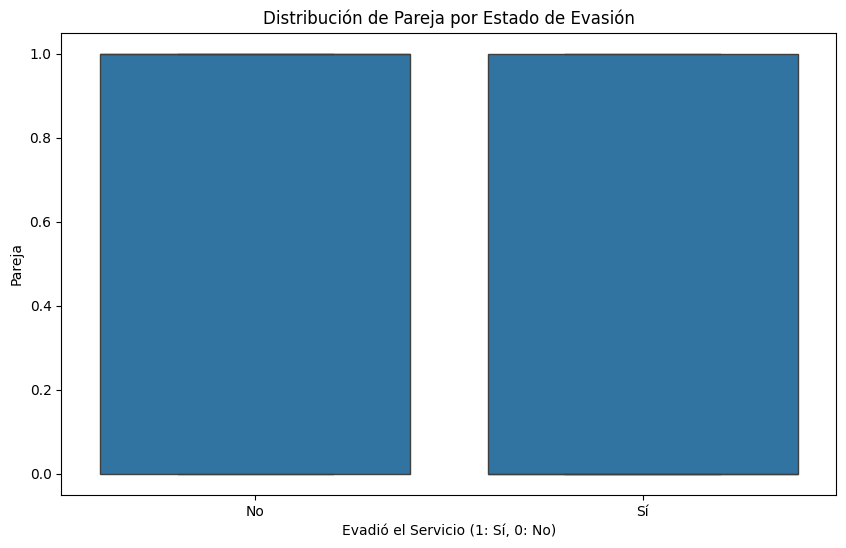


--- Análisis para la columna: Dependientes ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.343646,0.474969,0.0,0.0,0.0,1.0,1.0
1,1869.0,0.174425,0.379576,0.0,0.0,0.0,0.0,1.0


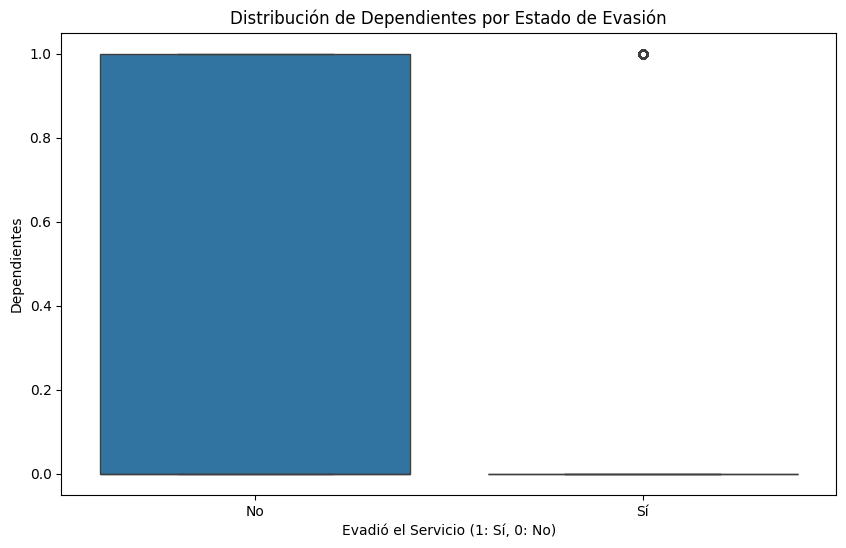


--- Análisis para la columna: Meses_Contrato ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,37.321045,24.178367,0.0,14.0,37.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


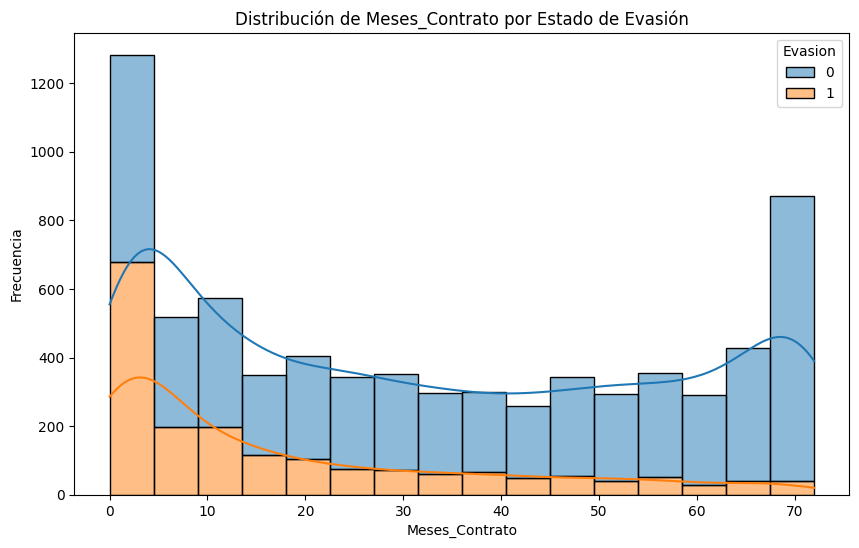


--- Análisis para la columna: Servicio_Telefonico ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.900519,0.299335,0.0,1.0,1.0,1.0,1.0
1,1869.0,0.909042,0.287626,0.0,1.0,1.0,1.0,1.0


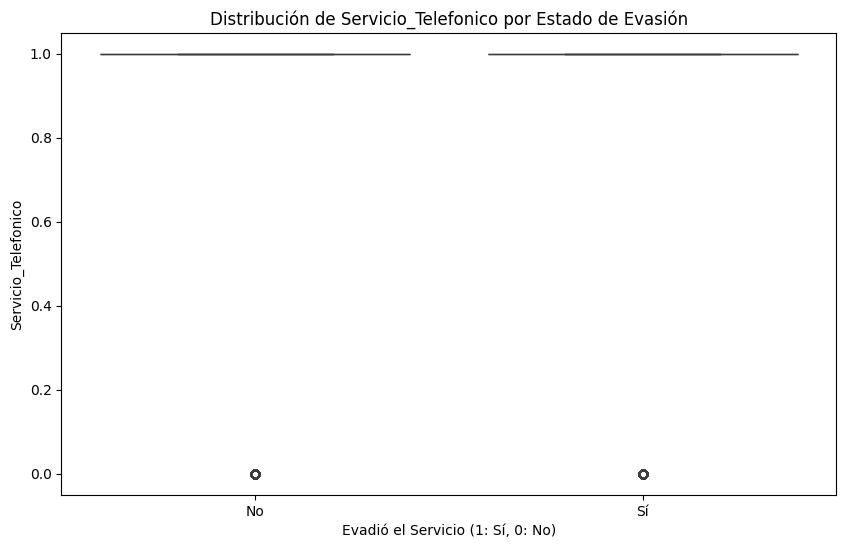


--- Análisis para la columna: Lineas_Multiples ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.410337,0.49194,0.0,0.0,0.0,1.0,1.0
1,1869.0,0.454789,0.498085,0.0,0.0,0.0,1.0,1.0


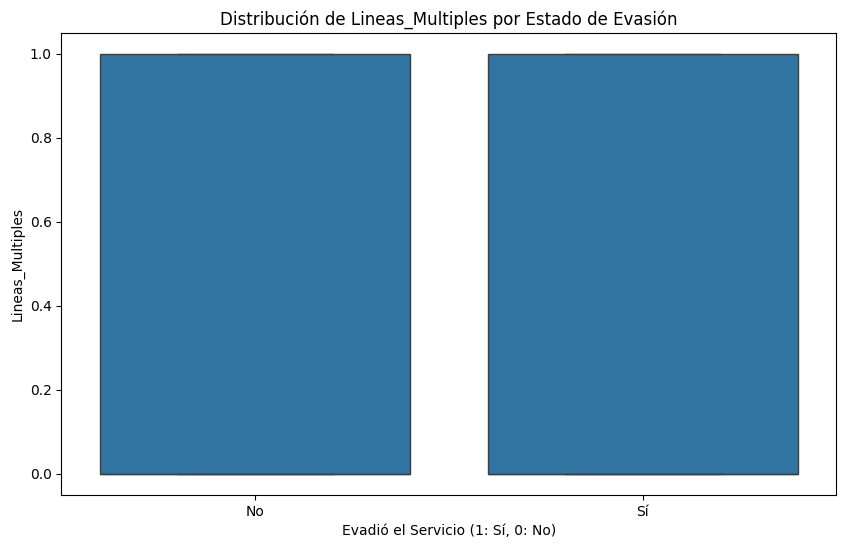


--- Análisis para la columna: Seguridad_Online ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.330308,0.470367,0.0,0.0,0.0,1.0,1.0
1,1869.0,0.157838,0.364687,0.0,0.0,0.0,0.0,1.0


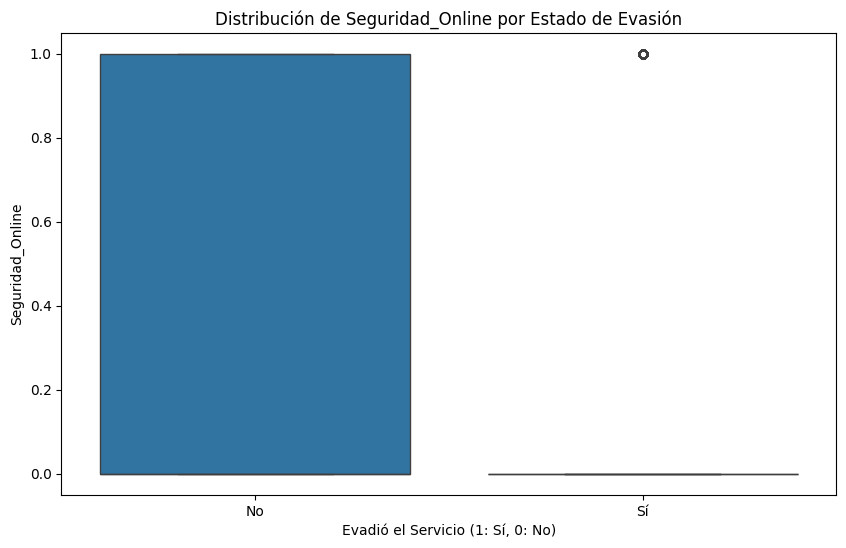


--- Análisis para la columna: Respaldo_Online ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.366988,0.482028,0.0,0.0,0.0,1.0,1.0
1,1869.0,0.279829,0.449035,0.0,0.0,0.0,1.0,1.0


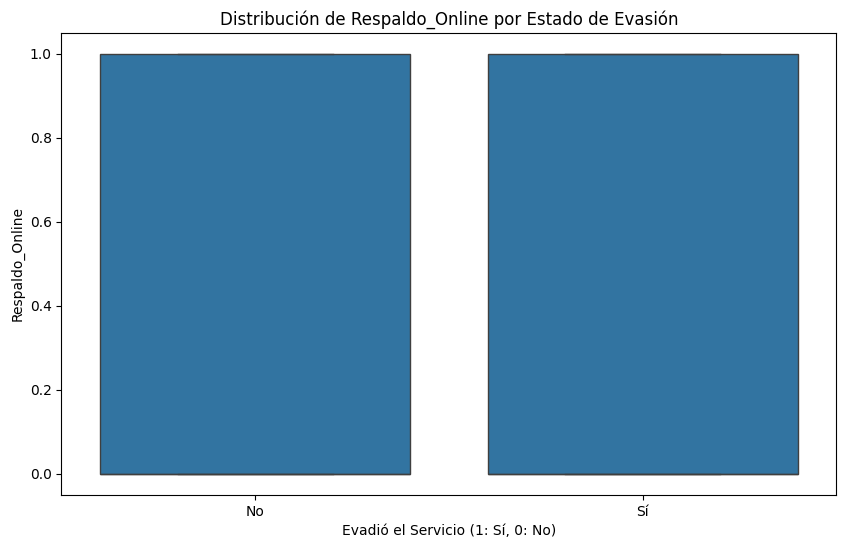


--- Análisis para la columna: Proteccion_Dispositivo ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.360504,0.480191,0.0,0.0,0.0,1.0,1.0
1,1869.0,0.2916,0.454621,0.0,0.0,0.0,1.0,1.0


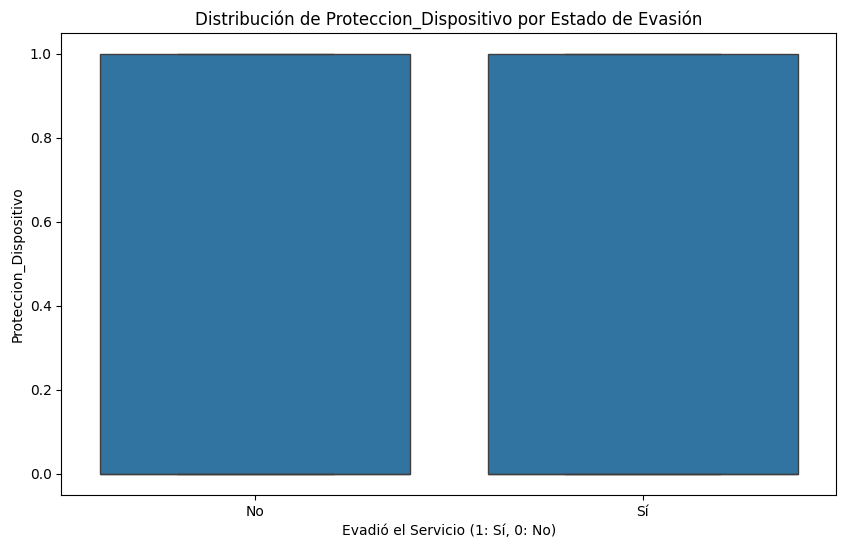


--- Análisis para la columna: Soporte_Tecnico ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.332345,0.471098,0.0,0.0,0.0,1.0,1.0
1,1869.0,0.165864,0.372058,0.0,0.0,0.0,0.0,1.0


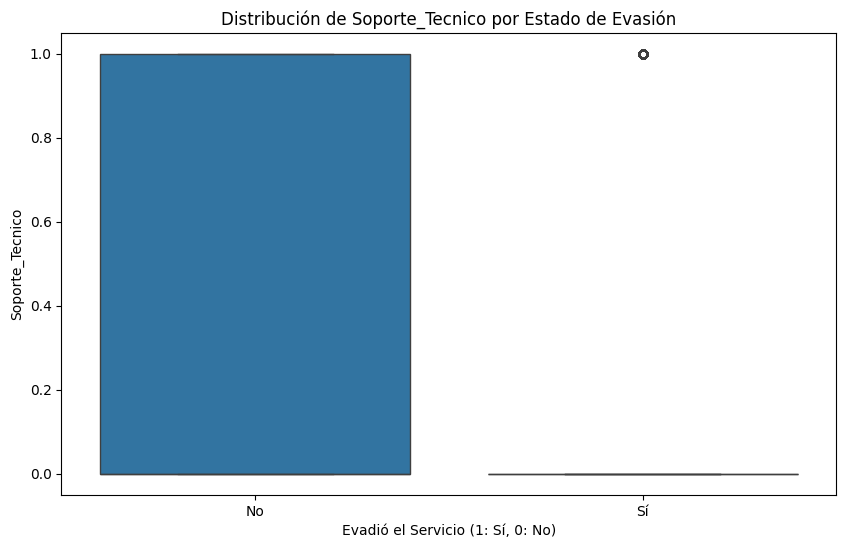


--- Análisis para la columna: TV_Streaming ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.366062,0.481771,0.0,0.0,0.0,1.0,1.0
1,1869.0,0.435527,0.495959,0.0,0.0,0.0,1.0,1.0


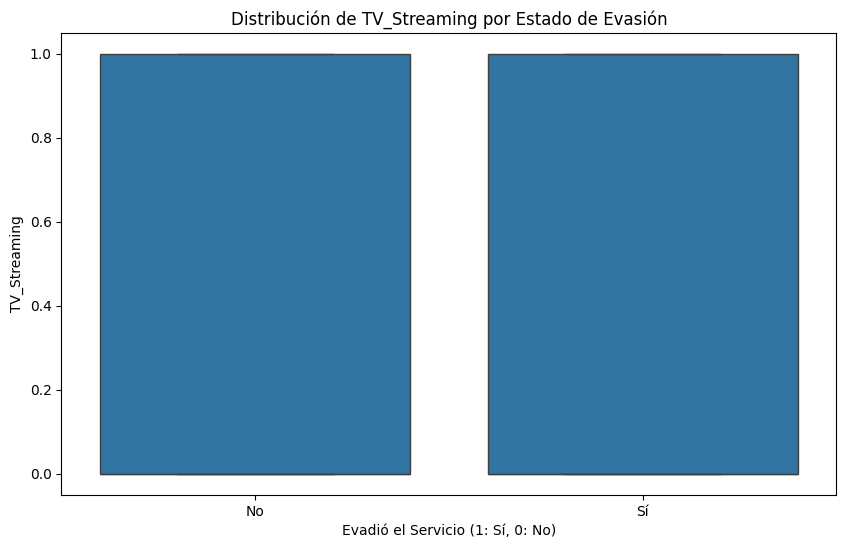


--- Análisis para la columna: Peliculas_Streaming ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.370137,0.482886,0.0,0.0,0.0,1.0,1.0
1,1869.0,0.437667,0.496232,0.0,0.0,0.0,1.0,1.0


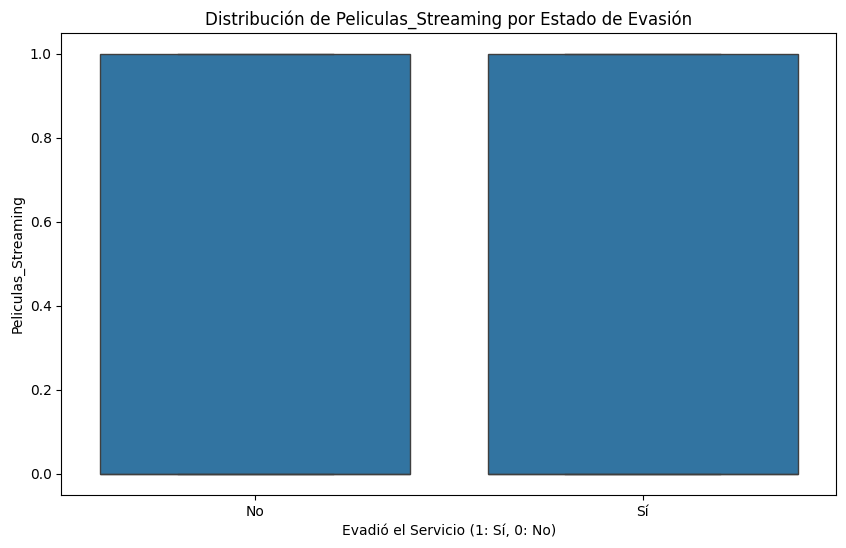


--- Análisis para la columna: Facturacion_Digital ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,0.539274,0.498501,0.0,0.0,1.0,1.0,1.0
1,1869.0,0.749064,0.433668,0.0,0.0,1.0,1.0,1.0


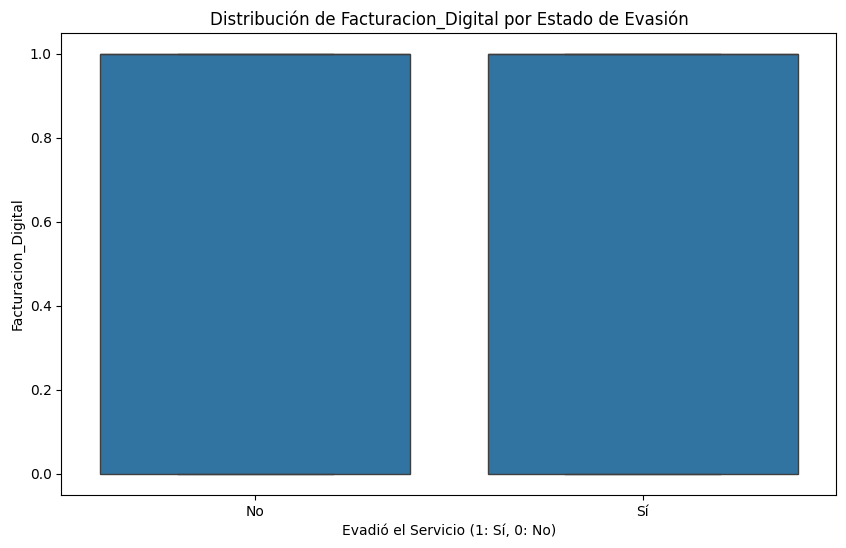


--- Análisis para la columna: Cargos_Mensuales ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,61.354224,31.105006,18.25,25.10,64.50,88.6375,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.2000,118.35


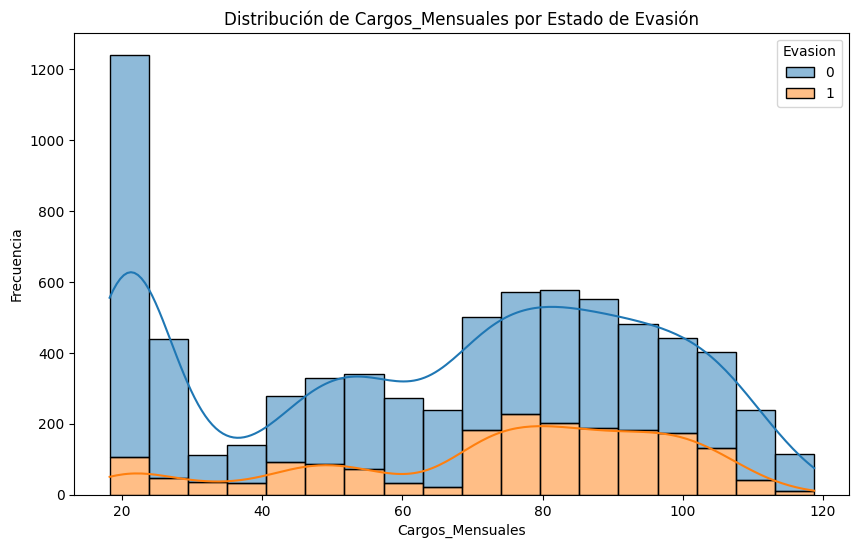


--- Análisis para la columna: Cuentas_Diarias ---

Estadísticas descriptivas por estado de evasión:


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
0,5398.0,2.045056,1.036908,0.61,0.84,2.15,2.9575,3.96
1,1869.0,2.481450,0.822287,0.63,1.87,2.66,3.1400,3.94


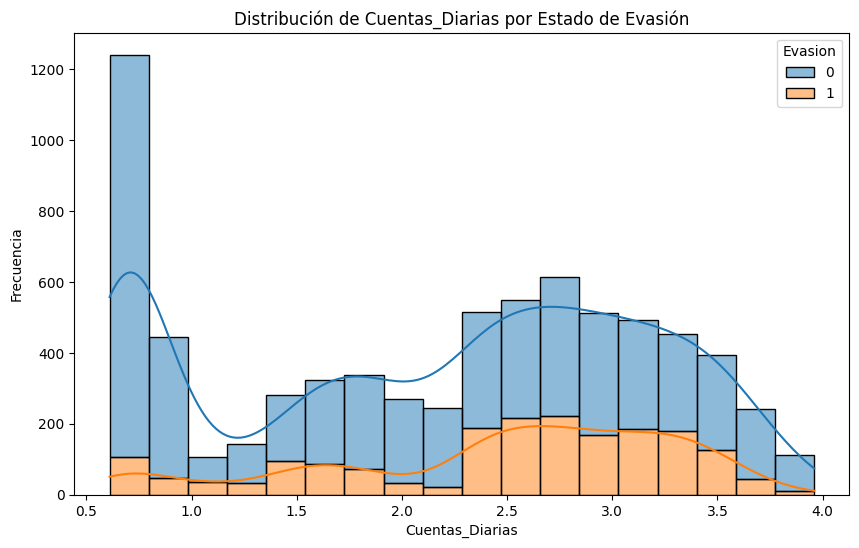


✅ Análisis de evasión por variables numéricas completado.


In [14]:
# =============================================================================
# Conteo de evasion por variables numéricas
# =============================================================================
print("\n" + "="*80)
print("CONTEO DE EVASIÓN POR VARIABLES NUMÉRICAS")
print("="*80)

# Identify numerical columns (excluding the ID)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'ID_Cliente' in numeric_cols:
    numeric_cols.remove('ID_Cliente')
if 'Evasion' in numeric_cols:
    numeric_cols.remove('Evasion') # Exclude the target variable

print("\nAnalizando evasión por las siguientes variables numéricas:")
print(numeric_cols)

for col in numeric_cols:
    print(f"\n--- Análisis para la columna: {col} ---")

    # Calculate descriptive statistics for churned vs non-churned groups
    print("\nEstadísticas descriptivas por estado de evasión:")
    display(df.groupby('Evasion')[col].describe())

    # Visualize the distribution using histograms or box plots
    plt.figure(figsize=(10, 6))
    if df[col].nunique() > 20: # Use histogram for variables with many unique values (e.g., charges, tenure)
        sns.histplot(data=df, x=col, hue='Evasion', kde=True, multiple='stack')
        plt.title(f'Distribución de {col} por Estado de Evasión')
    else: # Use boxplot for variables with fewer unique numerical values (less likely after cleaning, but as a fallback)
         sns.boxplot(x='Evasion', y=col, data=df)
         plt.title(f'Distribución de {col} por Estado de Evasión')
         plt.xticks([0, 1], ['No', 'Sí'])

    plt.xlabel(col if df[col].nunique() > 20 else 'Evadió el Servicio (1: Sí, 0: No)')
    plt.ylabel('Frecuencia' if df[col].nunique() > 20 else col)
    plt.show()


print("\n✅ Análisis de evasión por variables numéricas completado.")

#¡Extra! Análisis de correlacion entre variables
####Descripción
####Esta actividad es un extra, por lo tanto es OPCIONAL.

####Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

####🔹 La relación entre la cuenta diaria y la evasión.
####🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

####Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

####Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos. 🚀


ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES (EXTRA)

Preparando datos para análisis de correlación...

Calculando matriz de correlación...

Correlaciones con Evasión:
Evasion                   1.000000
Metodo_Pago_Num           0.225318
Cuentas_Diarias           0.189918
Cargos_Mensuales          0.189866
Facturacion_Digital       0.186666
TV_Streaming              0.062430
Peliculas_Streaming       0.060586
Lineas_Multiples          0.039343
Servicio_Telefonico       0.012571
Genero                   -0.009555
Proteccion_Dispositivo   -0.063452
Cantidad_Servicios       -0.064642
Respaldo_Online          -0.080163
Pareja                   -0.148546
Soporte_Tecnico          -0.160440
Dependientes             -0.161384
Seguridad_Online         -0.166828
Meses_Contrato           -0.344079
Tipo_Contrato_Num        -0.387433
Name: Evasion, dtype: float64

Matriz de correlación guardada como 'matriz_correlacion.png'


/tmp/ipython-input-358054262.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlations.values, y=top_correlations.index, palette='viridis')



Top 10 correlaciones con evasión guardadas como 'top_correlaciones_evasion.png'

Análisis de Cuentas Diarias vs Evasión:


/tmp/ipython-input-358054262.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='Cuentas_Diarias', data=df_corr, palette='viridis')


Gráfico de cuentas diarias vs evasión guardado como 'cuentas_diarias_vs_evasion.png'

Análisis de Cantidad de Servicios vs Evasión:


/tmp/ipython-input-358054262.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_evasion.index, y=service_evasion.values, palette='rocket')


Gráfico de tasa de evasión por servicios guardado como 'tasa_evasion_servicios.png'

Análisis combinado: Cuentas Diarias vs Cantidad de Servicios vs Evasión
Gráfico de relación combinada guardado como 'relacion_compleja.png'

Reporte de análisis actualizado con resultados de correlación


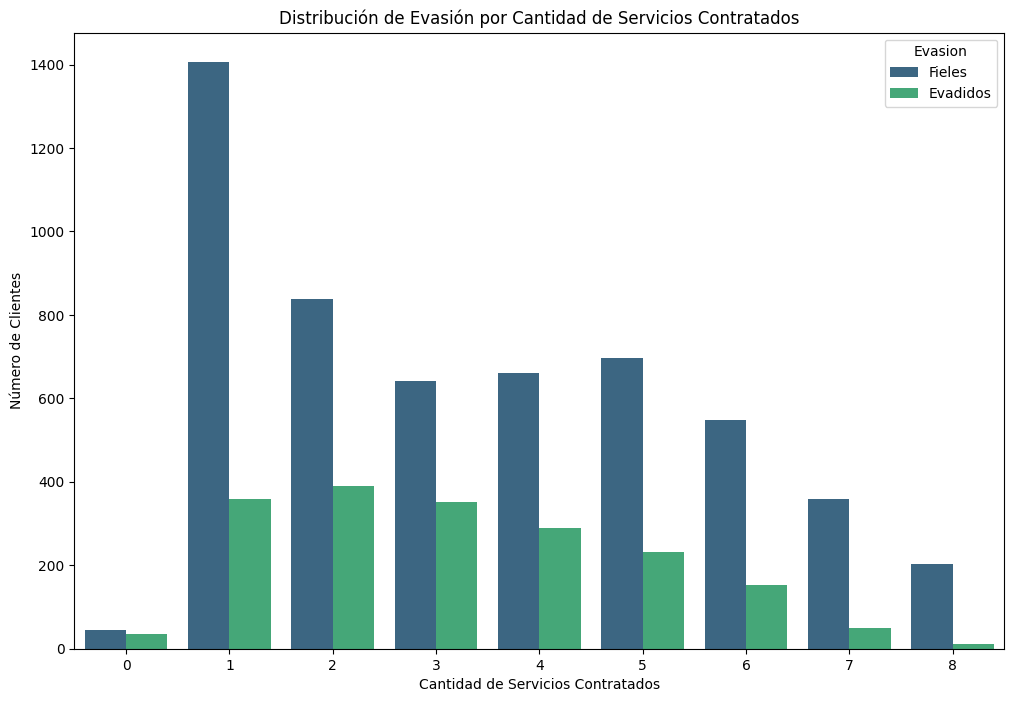

In [15]:
# =============================================================================
# ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES (EXTRA)
# =============================================================================
print("\n" + "="*80)
print("ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES (EXTRA)")
print("="*80)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Preparación de datos para correlación
print("\nPreparando datos para análisis de correlación...")

# Crear copia del DataFrame para no modificar el original
df_corr = df.copy()

# Convertir variables categóricas ordinales a numéricas
contract_mapping = {'Mensual': 1, 'Anual': 2, 'Bianual': 3}
df_corr['Tipo_Contrato_Num'] = df_corr['Tipo_Contrato'].map(contract_mapping)

payment_mapping = {
    'Cheque Postal': 1,
    'Transferencia Bancaria': 2,
    'Tarjeta de Crédito': 3,
    'Cheque Electrónico': 4
}
df_corr['Metodo_Pago_Num'] = df_corr['Metodo_Pago'].map(payment_mapping)

# Crear variable de cantidad de servicios contratados
services = [
    'Servicio_Telefonico',
    'Lineas_Multiples',
    'Seguridad_Online',
    'Respaldo_Online',
    'Proteccion_Dispositivo',
    'Soporte_Tecnico',
    'TV_Streaming',
    'Peliculas_Streaming'
]

df_corr['Cantidad_Servicios'] = df_corr[services].sum(axis=1)

# 2. Matriz de correlación
print("\nCalculando matriz de correlación...")
correlation_matrix = df_corr.corr(numeric_only=True)

# Filtrar solo correlaciones relevantes con Evasión
churn_correlations = correlation_matrix['Evasion'].sort_values(ascending=False)

print("\nCorrelaciones con Evasión:")
print(churn_correlations)

# 3. Visualización de correlaciones
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.tight_layout()
plt.savefig('matriz_correlacion.png')
plt.close()
print("\nMatriz de correlación guardada como 'matriz_correlacion.png'")

# 4. Correlaciones clave con Evasión
top_correlations = churn_correlations.drop('Evasion').sort_values(key=abs, ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_correlations.values, y=top_correlations.index, palette='viridis')
plt.title('Top 10 Correlaciones con Evasión')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variable')
plt.xlim(-0.6, 0.6)
plt.axvline(0, color='black', linestyle='--', alpha=0.3)

# Añadir valores
for i, v in enumerate(top_correlations.values):
    plt.text(v, i, f"{v:.3f}", color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('top_correlaciones_evasion.png')
plt.close()
print("\nTop 10 correlaciones con evasión guardadas como 'top_correlaciones_evasion.png'")

# 5. Análisis específico de Cuentas Diarias vs Evasión
print("\nAnálisis de Cuentas Diarias vs Evasión:")

plt.figure(figsize=(12, 8))
sns.boxplot(x='Evasion', y='Cuentas_Diarias', data=df_corr, palette='viridis')
plt.title('Distribución de Cuentas Diarias por Estado de Evasión')
plt.xlabel('Evadió el Servicio (0 = No, 1 = Sí)')
plt.ylabel('Cuentas Diarias ($)')

# Añadir estadísticas
daily_charges_0 = df_corr[df_corr['Evasion'] == 0]['Cuentas_Diarias']
daily_charges_1 = df_corr[df_corr['Evasion'] == 1]['Cuentas_Diarias']

plt.text(0, daily_charges_0.median(), f"Mediana: ${daily_charges_0.median():.2f}",
         ha='center', va='center', fontweight='bold', color='white')
plt.text(1, daily_charges_1.median(), f"Mediana: ${daily_charges_1.median():.2f}",
         ha='center', va='center', fontweight='bold', color='white')

plt.tight_layout()
plt.savefig('cuentas_diarias_vs_evasion.png')
plt.close()
print("Gráfico de cuentas diarias vs evasión guardado como 'cuentas_diarias_vs_evasion.png'")

# 6. Análisis de cantidad de servicios vs evasión
print("\nAnálisis de Cantidad de Servicios vs Evasión:")

plt.figure(figsize=(12, 8))
sns.countplot(x='Cantidad_Servicios', hue='Evasion', data=df_corr, palette='viridis')
plt.title('Distribución de Evasión por Cantidad de Servicios Contratados')
plt.xlabel('Cantidad de Servicios Contratados')
plt.ylabel('Número de Clientes')
plt.legend(title='Evasion', labels=['Fieles', 'Evadidos'])

# Calcular tasas de evasión por cantidad de servicios
service_evasion = df_corr.groupby('Cantidad_Servicios')['Evasion'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=service_evasion.index, y=service_evasion.values, palette='rocket')
plt.title('Tasa de Evasión por Cantidad de Servicios Contratados')
plt.xlabel('Cantidad de Servicios Contratados')
plt.ylabel('Tasa de Evasión')
plt.ylim(0, 0.5)

# Añadir porcentajes
for i, v in enumerate(service_evasion.values):
    plt.text(i, v + 0.01, f"{v:.1%}", ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('tasa_evasion_servicios.png')
plt.close()
print("Gráfico de tasa de evasión por servicios guardado como 'tasa_evasion_servicios.png'")

# 7. Análisis multivariable: Cuentas Diarias vs Cantidad de Servicios vs Evasión
print("\nAnálisis combinado: Cuentas Diarias vs Cantidad de Servicios vs Evasión")

plt.figure(figsize=(14, 10))
sns.scatterplot(x='Cantidad_Servicios', y='Cuentas_Diarias',
                hue='Evasion', style='Evasion',
                data=df_corr, palette='viridis', alpha=0.7)
plt.title('Relación entre Cuentas Diarias, Cantidad de Servicios y Evasión')
plt.xlabel('Cantidad de Servicios Contratados')
plt.ylabel('Cuentas Diarias ($)')
plt.legend(title='Evasion', labels=['Fieles', 'Evadidos'])
plt.tight_layout()
plt.savefig('relacion_compleja.png')
plt.close()
print("Gráfico de relación combinada guardado como 'relacion_compleja.png'")

# 8. Guardar resultados en el reporte
with open('reporte_analisis.txt', 'a') as f:
    f.write("\n\nANÁLISIS DE CORRELACIÓN (EXTRA)\n")
    f.write("===============================\n")
    f.write("\nTop 10 correlaciones con evasión:\n")
    f.write(churn_correlations.head(10).to_string())
    f.write("\n\nAnálisis de Cuentas Diarias:\n")
    f.write(f"- Clientes fieles: Mediana = ${daily_charges_0.median():.2f}\n")
    f.write(f"- Clientes evadidos: Mediana = ${daily_charges_1.median():.2f}\n")
    f.write("\nTasa de evasión por cantidad de servicios:\n")
    f.write(service_evasion.to_string())

print("\nReporte de análisis actualizado con resultados de correlación")